In [ ]:
#Reduce the dataset into 2 PCA components for the project

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO

In [7]:
# Loading and parsing the CSV data
data = pd.read_csv("Cancer_Dataset.csv")

In [35]:
data

Column1 Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0      842302       M    17.99    10.38   122.80   1001.0  0.11840  0.27760   
1      842517       M    20.57    17.77   132.90   1326.0  0.08474  0.07864   
2    84300903       M    19.69    21.25   130.00   1203.0  0.10960  0.15990   
3    84348301       M    11.42    20.38    77.58    386.1  0.14250  0.28390   
4    84358402       M    20.29    14.34   135.10   1297.0  0.10030  0.13280   
..        ...     ...      ...      ...      ...      ...      ...      ...   
564    926424       M    21.56    22.39   142.00   1479.0  0.11100  0.11590   
565    926682       M    20.13    28.25   131.20   1261.0  0.09780  0.10340   
566    926954       M    16.60    28.08   108.30    858.1  0.08455  0.10230   
567    927241       M    20.60    29.33   140.10   1265.0  0.11780  0.27700   
568     92751       B     7.76    24.54    47.92    181.0  0.05263  0.04362   

     Column9  Column10  ...  Column23  Column24  Column25  Column26  Column27  \
0    0.30010   0.14710  ...    25.380     17.33    184.60    2019.0   0.16220   
1    0.08690   0.07017  ...    24.990     23.41    158.80    1956.0   0.12380   
2    0.19740   0.12790  ...    23.570     25.53    152.50    1709.0   0.14440   
3    0.24140   0.10520  ...    14.910     26.50     98.87     567.7   0.20980   
4    0.19800   0.10430  ...    22.540     16.67    152.20    1575.0   0.13740   
..       ...       ...  ...       ...       ...       ...       ...       ...   
564  0.24390   0.13890  ...    25.450     26.40    166.10    2027.0   0.14100   
565  0.14400   0.09791  ...    23.690     38.25    155.00    1731.0   0.11660   
566  0.09251   0.05302  ...    18.980     34.12    126.70    1124.0   0.11390   
567  0.35140   0.15200  ...    25.740     39.42    184.60    1821.0   0.16500   
568  0.00000   0.00000  ...     9.456     30.37     59.16     268.6   0.08996   

     Column28  Column29  Column30  Column31  Column32  
0     0.66560    0.7119    0.2654    0.4601   0.11890  
1     0.18660    0.2416    0.1860    0.2750   0.08902  
2     0.42450    0.4504    0.2430    0.3613   0.08758  
3     0.86630    0.6869    0.2575    0.6638   0.17300  
4     0.20500    0.4000    0.1625    0.2364   0.07678  
..        ...       ...       ...       ...       ...  
564   0.21130    0.4107    0.2216    0.2060   0.07115  
565   0.19220    0.3215    0.1628    0.2572   0.06637  
566   0.30940    0.3403    0.1418    0.2218   0.07820  
567   0.86810    0.9387    0.2650    0.4087   0.12400  
568   0.06444    0.0000    0.0000    0.2871   0.07039  

[569 rows x 32 columns]

In [9]:
# Preprocessing: Separate features and labels
X = data.iloc[:, 2:32].values  # Numerical features (Columns 3-32)
y = data['Column2'].values     # Diagnosis (M/B)
ids = data['Column1'].values   # IDs for output

In [11]:
# Handling missing or invalid data
X = np.where(np.isnan(X), np.nanmean(X, axis=0), X)  # Replace NaN with column mean

In [13]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Applying PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [17]:
# Creating a new DataFrame with ID, diagnosis, and 2 PCA components
reduced_data = pd.DataFrame({
    'ID': ids,
    'Diagnosis': y,
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1]
})

In [19]:
# Saving the reduced dataset
reduced_data.to_csv('reduced_cancer_dataset.csv', index=False)

In [29]:
# Visualizing the 2 PCA components
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

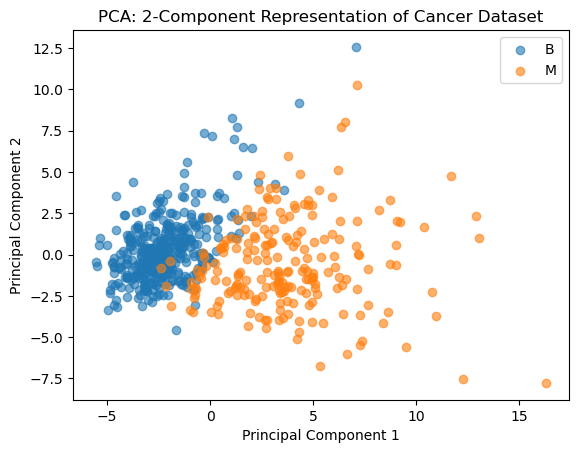

In [33]:
for label in np.unique(y):
    mask = y == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2-Component Representation of Cancer Dataset')
plt.legend()
plt.savefig('pca_2_components_plot.png')

In [25]:
# Printing explained variance ratio
print("Explained Variance Ratios:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.4f}")

Explained Variance Ratios:
PC1: 0.4427
PC2: 0.1897
Total Variance Explained: 0.6324


In [27]:
# Saving the reduced dataset as an artifact
with open('reduced_cancer_dataset.csv', 'r') as f:
    reduced_csv_content = f.read()